**Download the dataset**

In [36]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import numpy as np
import os

In [37]:
basic_dir = "/content/ds/data"
train_dir = os.path.join(basic_dir,"train")
test_dir = os.path.join(basic_dir,"test")


In [38]:
#Load and preprocess data
img_size = 255
batch_size = 16

In [39]:
train_data_gen = ImageDataGenerator(rescale=1./255,rotation_range=20,zoom_range=0.2,horizontal_flip=True)
test_data_gen = ImageDataGenerator(rescale=1./255)

In [40]:
#assign the dataset
train_gen = train_data_gen.flow_from_directory(train_dir,target_size=(img_size,img_size),
                                               class_mode = "categorical",batch_size = batch_size)
test_gen = test_data_gen.flow_from_directory(test_dir,target_size=(img_size,img_size),
                                               class_mode = "categorical",batch_size = batch_size)

Found 4024 images belonging to 2 classes.
Found 880 images belonging to 2 classes.


In [41]:
#Create base model
base_model = VGG16(weights="imagenet",include_top = False,input_shape=(255,255,3))
base_model.trainable = False

In [42]:
x = base_model.output
x = Flatten()(x)
x = Dense(128,activation="relu")(x)
x = Dropout(0.5)(x)
prediction = Dense(2,activation="sigmoid")(x)


In [43]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 255, 255, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 255, 255, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 255, 255, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 127, 127, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 127, 127, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 63, 63, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 63, 63, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 63, 63, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 63, 63, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 31, 31, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 31, 31, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 31, 31, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 15, 15, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 15, 15, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [44]:
model = Model(inputs=base_model.input,outputs=prediction)

In [45]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [46]:
model.fit(train_gen,epochs=5,validation_data=test_gen)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.7909 - loss: 0.7279

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


252/252 ━━━━━━━━━━━━━━━━━━━━ 115s 394ms/step - accuracy: 0.7912 - loss: 0.7265 - val_accuracy: 0.9455 - val_loss: 0.1385
Epoch 2/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 87s 346ms/step - accuracy: 0.9139 - loss: 0.2020 - val_accuracy: 0.9670 - val_loss: 0.0965
Epoch 3/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 87s 344ms/step - accuracy: 0.9326 - loss: 0.1775 - val_accuracy: 0.9795 - val_loss: 0.0639
Epoch 4/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 87s 345ms/step - accuracy: 0.9394 - loss: 0.1481 - val_accuracy: 0.9511 - val_loss: 0.1256
Epoch 5/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 90s 358ms/step - accuracy: 0.9283 - loss: 0.1669 - val_accuracy: 0.9830 - val_loss: 0.0498


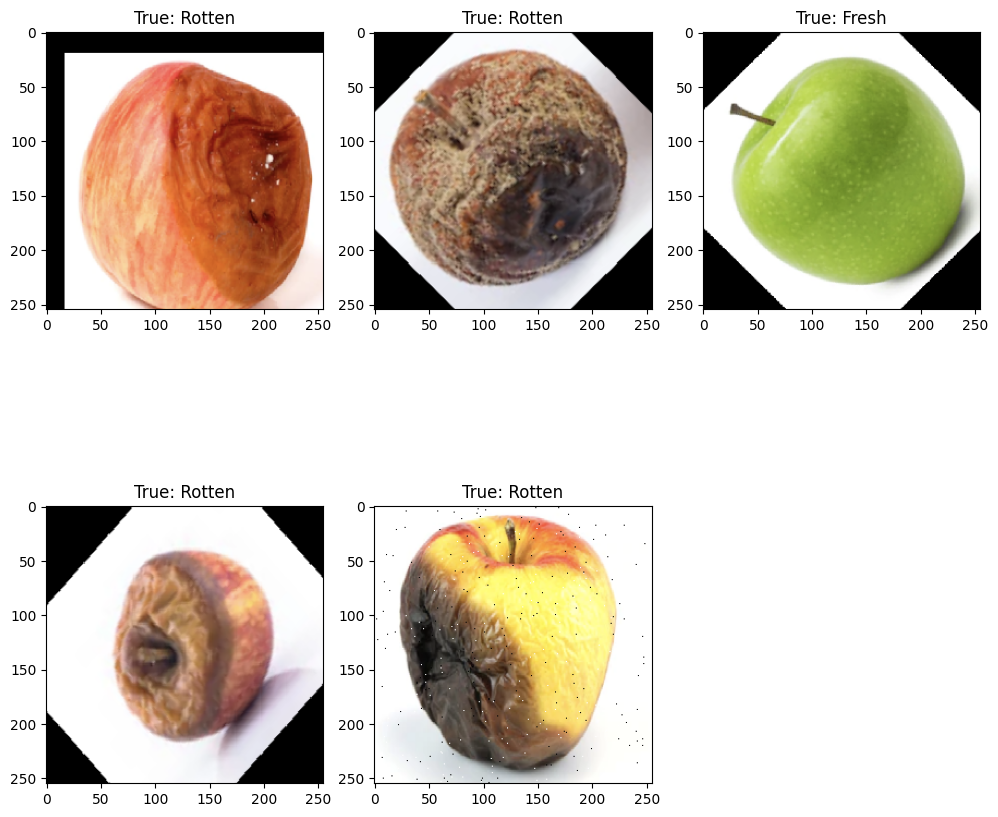

In [54]:
# Visualization
f = plt.figure(figsize=(10,10))

# Get one batch of images and labels from the test generator
test_images, test_labels = next(test_gen)

# Display the first few images from the batch
for i in range(min(5, test_images.shape[0])): # Display up to 5 images or the number of images in the batch
  ax = f.add_subplot(2,3,i+1)
  ax.imshow(test_images[i])

  # Corrected title with proper f-string syntax for conditional
  ax.set_title(f"True: {'Fresh' if np.argmax(test_labels[i]) == 0 else 'Rotten'}")

plt.tight_layout()
plt.show()

In [47]:
validation_dir = os.path.join(basic_dir,"validation")